In [173]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:75% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

- 2013년이후 전국 아파트분양가격
- 공공데이터 포털에 있는 데이터를 Pandas의 melt, concat, transpose와 같은 reshape 기능을 활용해 분석
- groupby, pivot_table, info, describe, value_counts등을 통한 데이터 요약과 분석
- 이를 통해 전혀 다른 두 데이터의 정제와 병합, 수치형 데이터의 차이를 이해하고 다양한 그래프로 시각화(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [174]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본 폰트로 하려면
# from matplotlib.font_manager import FontProperties
# font_path = 'C:/Windows/Fonts/HMFMPYUN.TTF'
# font_prop = FontProperties(fname=font_path, size=15)
# plt.rc('font', family=font_prop.get_name())

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore')

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 "아파트 분양 가격"을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [175]:
df_first = pd.read_csv('C:/ai/source/01_python/data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding ='cp949')
df_first.head(1)

지역  2013년12월  2014년1월  2014년2월  2014년3월  2014년4월  2014년5월  2014년6월  \
0  서울     18189    17925    17925    18016    18098    19446    18867   

   2014년7월  2014년8월  ...  2014년11월  2014년12월  2015년1월  2015년2월  2015년3월  \
0    18742    19274  ...     20242     20269    20670    20670    19415   

   2015년4월  2015년5월  2015년6월  2015년7월  2015년8월  
0    18842    18367    18374    18152    18443  

[1 rows x 22 columns]

In [176]:
df_first.shape

(17, 22)

In [177]:
pd.options.display.max_columns=22 # 최대 display가능한 열수 수정
df_first.tail(1)

지역  2013년12월  2014년1월  2014년2월  2014년3월  2014년4월  2014년5월  2014년6월  \
16  제주      7674     7900     7900     7900     7900     7900     7914   

    2014년7월  2014년8월  2014년9월  2014년10월  2014년11월  2014년12월  2015년1월  2015년2월  \
16     7914     7914     7833      7724      7724      7739     7739     7739   

    2015년3월  2015년4월  2015년5월  2015년6월  2015년7월  2015년8월  
16     7826     7285     7285     7343     7343     7343

In [178]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [179]:
df_first.isna().sum() # 열별 결측치 갯수

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [180]:
df_first_heat = df_first.set_index('지역')
df_first_heat.sample(1)

2013년12월  2014년1월  2014년2월  2014년3월  2014년4월  2014년5월  2014년6월  2014년7월  \
지역                                                                            
인천     10204    10204    10408    10408    10000     9844    10058     9974   

    2014년8월  2014년9월  2014년10월  2014년11월  2014년12월  2015년1월  2015년2월  2015년3월  \
지역                                                                              
인천     9973     9973     10016     10020     10020    10017     9876     9876   

    2015년4월  2015년5월  2015년6월  2015년7월  2015년8월  
지역                                               
인천     9938    10551    10443    10443    10449

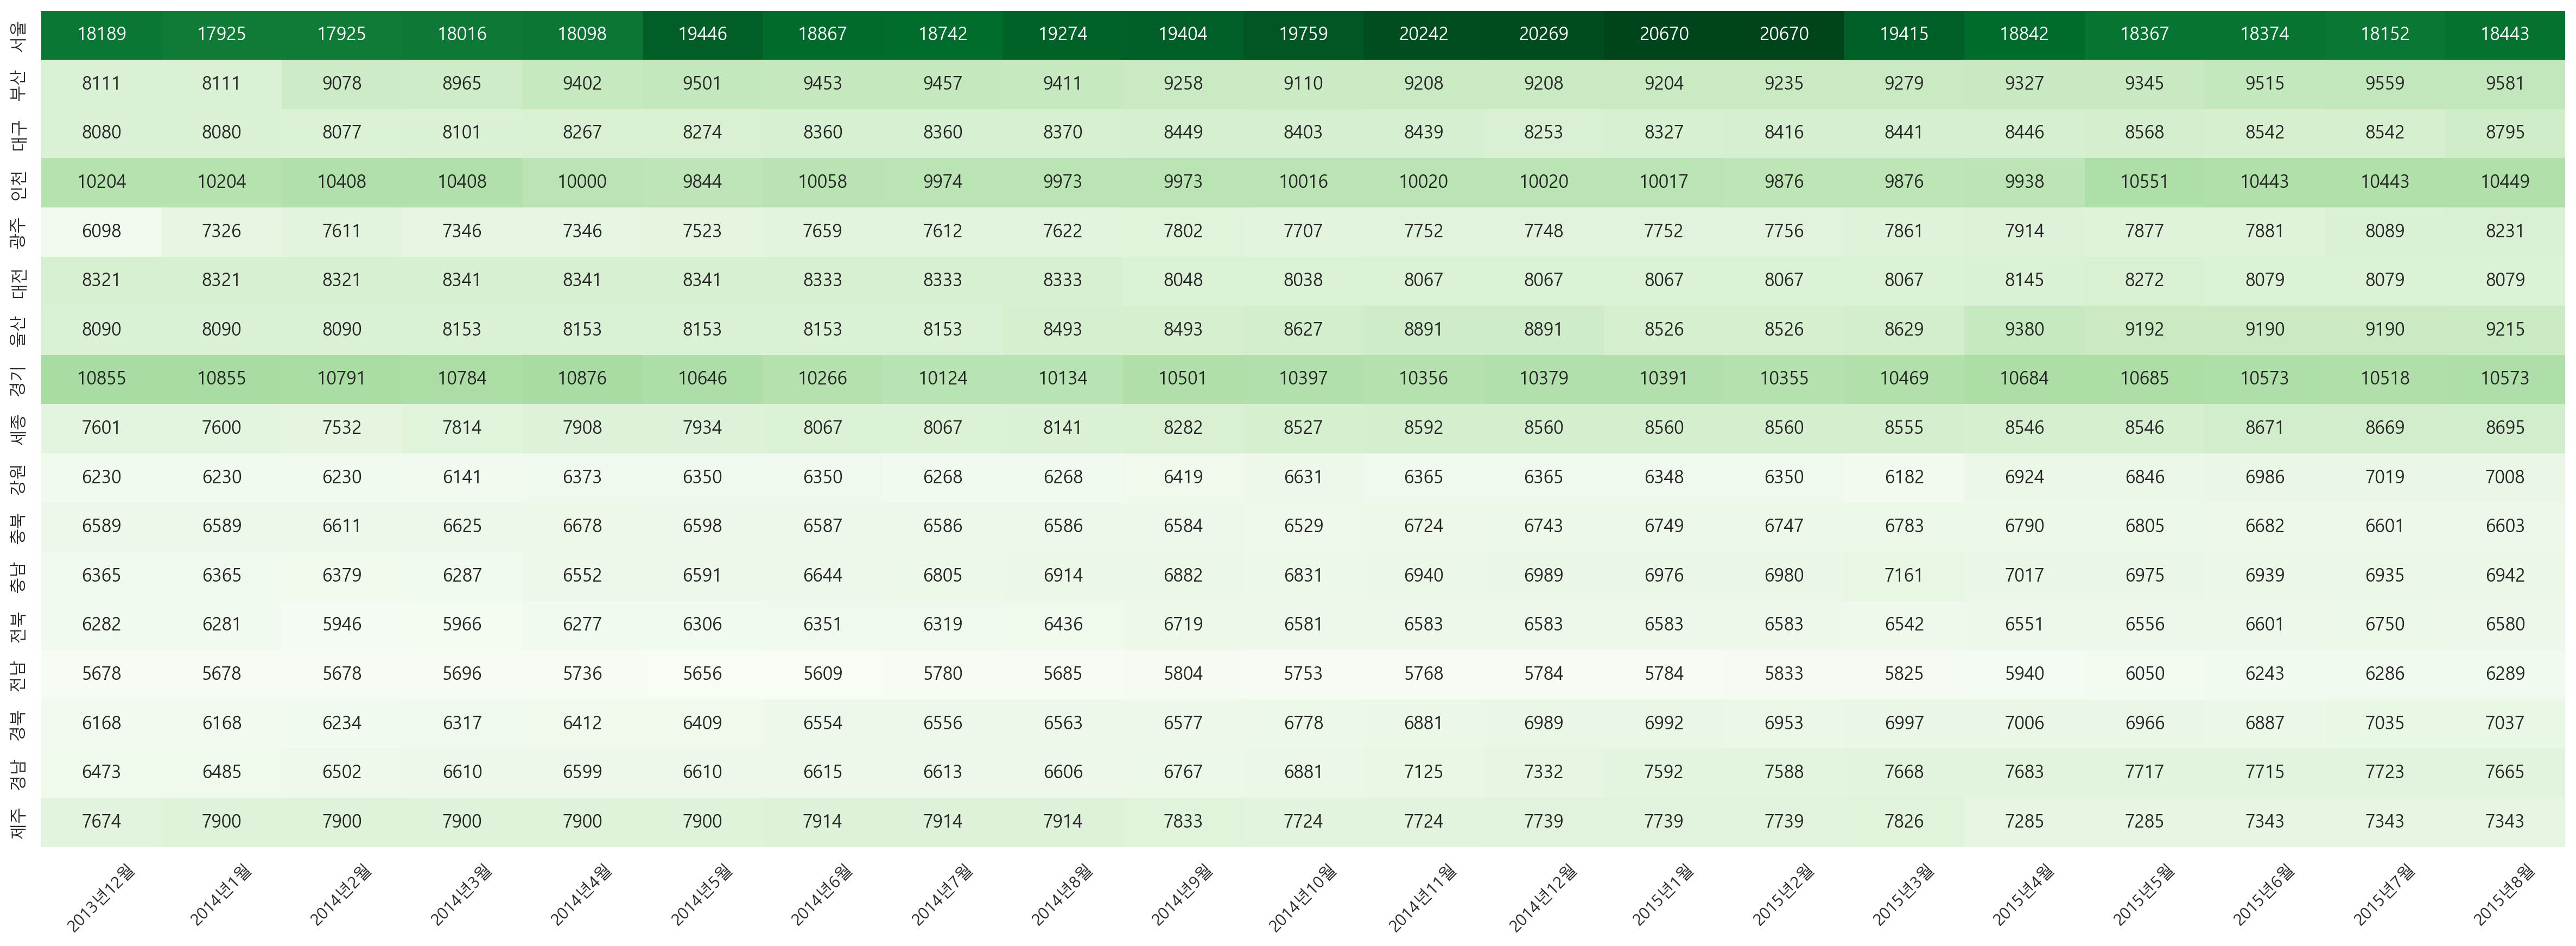

In [181]:
plt.figure(figsize=(30,10))
sns.heatmap(df_first_heat, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xticks(rotation=45)
plt.ylabel(None)
plt.show()

## (2) 이후 데이터는 df_last 변수에 담아 탐색

In [182]:
df_last = pd.read_csv('C:/ai/source/01_python/data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                      encoding ='cp949')
df_last.head()

지역명                     규모구분    연도   월 분양가격(제곱미터)
0  서울                     모든면적  2015  10       5841
1  서울            전용면적 60제곱미터이하  2015  10       5652
2  서울   전용면적 60제곱미터초과 85제곱미터이하  2015  10       5882
3  서울  전용면적 85제곱미터초과 102제곱미터이하  2015  10       5721
4  서울           전용면적 102제곱미터초과  2015  10       5879

In [183]:
# 데이터 요약하기
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [184]:
# 열별 결측치 갯수
df_last.isnull().sum()
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [185]:
# 열별 결측치를 제외한 갯수
df_last.notnull().sum()
df_last.notna().sum()

지역명           9095
규모구분          9095
연도            9095
월             9095
분양가격(제곱미터)    8481
dtype: int64

In [186]:
# '분양가격(제곱미터)' 컬럼의 결측치 갯수와 결측치가 아닌 갯수, 전체 데이터 수
print('전체 갯수 :', len(df_last['분양가격(제곱미터)']), df_last.shape[0])
print('결측치가 아닌 갯수 :', df_last['분양가격(제곱미터)'].notnull().sum())
print('결측치가 아닌 갯수 :', df_last['분양가격(제곱미터)'].notna().sum())
print('결측치 갯수 :', df_last['분양가격(제곱미터)'].isnull().sum())
print('결측치 갯수 :', df_last['분양가격(제곱미터)'].isna().sum())

전체 갯수 : 9095 9095
결측치가 아닌 갯수 : 8481
결측치가 아닌 갯수 : 8481
결측치 갯수 : 614
결측치 갯수 : 614


# 4. df_last 데이셋에 평당분양가격컬럼 추가

## (1) astype('float')나 pd.to_numeric() 사용
## (2) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용
## (3) df_last['분양가격(제곱미터)']*3.3

In [238]:
df_last.loc[4,'분양가격(제곱미터)']

5879.0

In [239]:
# df_last.groupby('지역명')['분양가격(제곱미터)'].mean() 에러남
# df_last['분양가격(제곱미터)'] * 3.3 에러남

In [240]:
# df_last['분양가격(제곱미터)'].astype('float') #'  ', '6,244' -> 에러남
#pd.to_numeric?
# 숫자로 변경할 때 예외발생시 예외발생말고 NaN으로
pd.to_numeric(df_last['분양가격(제곱미터)'], 
              errors='coerce').isna().sum() # 원래결측치갯수(614)

740

In [241]:
# 분양가격에 space가 있는 경우 : 28, 29, 34, ...
df_last[df_last['분양가격(제곱미터)'].str.strip() == ''].shape

AttributeError: Can only use .str accessor with string values!

In [242]:
df_last.loc[df_last['분양가격(제곱미터)'].str.strip() == '', 
            '지역명'].value_counts()

AttributeError: Can only use .str accessor with string values!

In [243]:
# 분양가격에 ,가 있는 경우
df_last[df_last['분양가격(제곱미터)'].notnull() &
    (df_last['분양가격(제곱미터)'].str.find(',')!=-1) ]

AttributeError: Can only use .str accessor with string values!

### apply
- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [244]:
# 콤마가 있는 문자에서 콤마 없애기 방법1
temp = '12,523'
temp.replace(',','')

'12523'

In [245]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,523'
tempsplited = temp.split(',')
''.join(tempsplited)

'12523'

In [246]:
df_last.loc[368]

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
평당분양가격                            NaN
Name: 368, dtype: object

In [247]:
# 분양가격 컬럼에 콤마(,)가 있는 경우 콤마(,)를 제거('5,123' -> 5123 / '5123' -> 5123)
# 공백문자가 있는 경우 np.nan로 바꾸는 함수
def commadrop(row):
    row = row.copy()
    price = row['분양가격(제곱미터)']
    # price(스칼라데이터)가 결측치인지 여부
        # (1) price is np.nan : 값의 타입에 상관없이 nan인지 여부
        # (2) pd.isna(price), pd.isnull(값) : 값의 타입에 상관없이 nan인지 여부
        # (3) np.isnan(숫자데이터): 값이 숫자가 아닐 경우 에러. 숫자일경우 nan인지 여부
    if price is np.nan:
        pass
    elif price.strip() == '': # space면 결측치로
        row['분양가격(제곱미터)'] = np.nan
    elif price.find(',') != -1: # 콤마(,)가 있으면 ,없애고 float형변환
        pricesplited = price.split(',')
        row['분양가격(제곱미터)'] = float(''.join(pricesplited))
    else:
        row['분양가격(제곱미터)'] = float(price)
    return row
    
commadrop(df_last.loc[80]) # 콤마 제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자의 경우 nan
commadrop(df_last.loc[368]) # nan의 경우 nan

AttributeError: 'numpy.float64' object has no attribute 'strip'

In [248]:
# 공백문자는 결측치로, 콤마는 제거하기를 모든 행에 적용
df_last.apply(commadrop, axis=1)

AttributeError: 'float' object has no attribute 'strip'

In [249]:
df_last.apply(commadrop, axis=1).isna().sum()

AttributeError: 'float' object has no attribute 'strip'

### map

In [199]:
# 결측치->결측치 return, 공백문자->결측치 return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        pricesplited = price.split(',')
        return float(''.join(pricesplited))
    else:
        return float(price)

commadrop2(df_last.loc[80, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

nan

- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [200]:
df_last['분양가격(제곱미터)'].apply(commadrop2)
df_last['분양가격(제곱미터)'].map(commadrop2)

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090    7703.0
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

### apply나 map사용 안 하기

In [201]:
pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',','')).isna().sum()

740

In [202]:
df_last['분양가격(제곱미터)'] = \
    pd.to_numeric(df_last['분양가격(제곱미터)'].str.strip().str.replace(',',''))

In [203]:
# 80(콤마있었던 행), 28(공백문자), 368(결측치)
df_last.loc[80]
df_last.loc[28]
df_last.loc[368]
df_last.loc[1]

지역명                      서울
규모구분          전용면적 60제곱미터이하
연도                     2015
월                        10
분양가격(제곱미터)           5652.0
Name: 1, dtype: object

In [204]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [205]:
df_last['평당분양가격'] = df_last['분양가격(제곱미터)']*3.3
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
 5   평당분양가격      8355 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 426.5+ KB


In [206]:
df_last['평당분양가격'] = df_last['분양가격(제곱미터)']*3.3

# 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

In [51]:
df_last.head()

지역명                     규모구분    연도   월  분양가격(제곱미터)   평당분양가격
0  서울                     모든면적  2015  10      5841.0  19275.3
1  서울            전용면적 60제곱미터이하  2015  10      5652.0  18651.6
2  서울   전용면적 60제곱미터초과 85제곱미터이하  2015  10      5882.0  19410.6
3  서울  전용면적 85제곱미터초과 102제곱미터이하  2015  10      5721.0  18879.3
4  서울           전용면적 102제곱미터초과  2015  10      5879.0  19400.7

In [55]:
df_last['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [60]:
# 전용면적, 이하, ' '없애기, 제곱미터-> m(alt+0178)，　초과　－＞　～
x = '전용면적 85제곱미터초과 102제곱미터이하'
#x.replace('전용면적','').replace('이하','').replace('이하','').replace('제곱미터')~

import re

re.sub('전용면적|이하| ', '', x).replace('제곱미터','m').replace('초과','~')

'85m~102m'

In [65]:
#방법 1
df_last['전용면적']= df_last['규모구분'].apply(lambda x : 
                     re.sub('전용면적|이하| ', '', x).replace('제곱미터','m').replace('초과','~'))
df_last.head(2)


지역명           규모구분    연도   월  분양가격(제곱미터)   평당분양가격  전용면적
0  서울           모든면적  2015  10      5841.0  19275.3  모든면적
1  서울  전용면적 60제곱미터이하  2015  10      5652.0  18651.6   60m

In [69]:
# 방법 2
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace('전용면적',''))
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace('제곱미터','m'))
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace('초과','~'))
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace('이하',''))
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace(' ',''))

df_last.head()


지역명                     규모구분    연도   월  분양가격(제곱미터)   평당분양가격  \
0  서울                     모든면적  2015  10      5841.0  19275.3   
1  서울            전용면적 60제곱미터이하  2015  10      5652.0  18651.6   
2  서울   전용면적 60제곱미터초과 85제곱미터이하  2015  10      5882.0  19410.6   
3  서울  전용면적 85제곱미터초과 102제곱미터이하  2015  10      5721.0  18879.3   
4  서울           전용면적 102제곱미터초과  2015  10      5879.0  19400.7   

                    전용면적  
0                   모든면적  
1           전용면적60제곱미터이하  
2   전용면적60제곱미터초과85제곱미터이하  
3  전용면적85제곱미터초과102제곱미터이하  
4          전용면적102제곱미터초과

In [72]:
# 방법 3
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')\
                                        .str.replace('제곱미터','m²')\
                                        .str.replace('초과','~')\
                                        .str.replace('이하','')\
                                        .str.replace(' ','')

df_last.head()

지역명                     규모구분    연도   월  분양가격(제곱미터)   평당분양가격      전용면적
0  서울                     모든면적  2015  10      5841.0  19275.3      모든면적
1  서울            전용면적 60제곱미터이하  2015  10      5652.0  18651.6       60m
2  서울   전용면적 60제곱미터초과 85제곱미터이하  2015  10      5882.0  19410.6   60m~85m
3  서울  전용면적 85제곱미터초과 102제곱미터이하  2015  10      5721.0  18879.3  85m~102m
4  서울           전용면적 102제곱미터초과  2015  10      5879.0  19400.7     102m~

In [73]:
print(df_last['규모구분'].unique())
print(df_last['전용면적'].unique())

['모든면적' '전용면적 60제곱미터이하' '전용면적 60제곱미터초과 85제곱미터이하' '전용면적 85제곱미터초과 102제곱미터이하'
 '전용면적 102제곱미터초과']
['모든면적' '60m' '60m~85m' '85m~102m' '102m~']


In [76]:
df_last.drop(['규모구분','분양가격(제곱미터)'], axis = 1, inplace=True) # 열제거


df_last

지역명    연도   월   평당분양가격      전용면적
0     서울  2015  10  19275.3      모든면적
1     서울  2015  10  18651.6       60m
2     서울  2015  10  19410.6   60m~85m
3     서울  2015  10  18879.3  85m~102m
4     서울  2015  10  19400.7     102m~
...   ..   ...  ..      ...       ...
9090  제주  2024   8  25419.9      모든면적
9091  제주  2024   8      NaN       60m
9092  제주  2024   8  24799.5   60m~85m
9093  제주  2024   8      NaN  85m~102m
9094  제주  2024   8  26235.0     102m~

[9095 rows x 5 columns]

# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [77]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     9095 non-null   object 
 1   연도      9095 non-null   int64  
 2   월       9095 non-null   int64  
 3   평당분양가격  8355 non-null   float64
 4   전용면적    9095 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [78]:
df_last.to_csv('data/df_last.csv', index=False) # 전처리 단계 백업

# 7. 데이터 집계
- GroupBy(unstack()함수 이용) vs. pivot_table()
- 우선 결측치 대체전 데이터 집계와 시각화를 할 예정

In [86]:
df_last = pd.read_csv('data/df_last.csv')
df_last.head()

지역명    연도   월   평당분양가격      전용면적
0  서울  2015  10  19275.3      모든면적
1  서울  2015  10  18651.6       60m
2  서울  2015  10  19410.6   60m~85m
3  서울  2015  10  18879.3  85m~102m
4  서울  2015  10  19400.7     102m~

In [81]:
df_last = df_last[['지역명','전용면적','연도','월','평당분양가격']]

In [89]:
# 컬럼 순서를 바꿔서 백업
# df_last = df_last[['지역명','전용면적', '연도', '월', '평당분양가격']]
col = df_last.pop('전용면적') # '전용면적'컬럼 빼서 col변수 할당
df_last.insert(1, '전용면적', col) # 1번째 열에 col추가
df_last.head()

지역명      전용면적    연도   월   평당분양가격
0  서울      모든면적  2015  10  19275.3
1  서울       60m  2015  10  18651.6
2  서울   60m~85m  2015  10  19410.6
3  서울  85m~102m  2015  10  18879.3
4  서울     102m~  2015  10  19400.7

- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수()
- df_last.pivot_table(index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")
- pd.pivot_table(df_last, index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")

## (1) 지역별 데이터수

In [88]:
# 지열별 데이터 수(결측치 포함)
df_last['지역명'].value_counts() #정렬까지

서울    535
강원    535
경남    535
경북    535
전남    535
전북    535
충남    535
충북    535
세종    535
인천    535
울산    535
대전    535
광주    535
대구    535
부산    535
경기    535
제주    535
Name: 지역명, dtype: int64

In [96]:
# 지역명별 데이터 행 갯수(결측치 제외) : 결과가 1차원 시리즈 - groupby

df_last.groupby(['지역명'])['평당분양가격'].count().sort_values(
                                    #ascending=False 내림차순
)

지역명
울산    395
세종    409
대전    415
제주    439
광주    450
대구    495
전남    507
경북    511
경남    516
충남    516
전북    520
강원    523
서울    527
인천    531
부산    533
충북    533
경기    535
Name: 평당분양가격, dtype: int64

In [141]:
# 지역명별 데이터 행 갯수(결측치 제외) : 결과가 2차원 데이터프레임 - groupby
#1
df_last.groupby(['지역명'])[['평당분양가격']].count().sort_values(
    by='평당분양가격', ascending=False
)
# 2
df_last.groupby(['지역명'])['평당분양가격'].count().sort_values(
                                    # ascending=False 내림차순
).to_frame()
# 3
df_last.groupby(['지역명'])['평당분양가격'].count().reset_index().sort_values(
    by='평당분양가격', ascending=False
)
# 4
df_last.groupby(['지역명'], as_index=False)['평당분양가격'].count().sort_values(
    by='평당분양가격', ascending=False
)
# 5
df_last.groupby(['지역명'])[['평당분양가격']].count().sort_values(
    by='평당분양가격', ascending=False
).T







지역명      경기   충북   부산   인천   서울   강원   전북   경남   충남   경북   전남   대구   광주   제주  \
평당분양가격  535  533  533  531  527  523  520  516  516  511  507  495  450  439   

지역명      대전   세종   울산  
평당분양가격  415  409  395

In [109]:
# 지역명별 데이터 행 갯수(결측치 제외) : 결과가 2차원 데이터프레임 - pivot_table
 df_last.pivot_table(index=['지역명'],
                    values=['평당분양가격'],
                    aggfunc='count')

 pd.pivot_table(df_last, index=['지역명'],
                    values=['평당분양가격'],
                    aggfunc='count')

In [106]:
# 지역명별 평당분양가격 최대값

 df_last.groupby(['지역명'])[['평당분양가격']].max().reset_index().sort_values(
     by = '평당분양가격', ascending = False
 )

In [119]:
# 지역명별 평당분양가격 평균

df_last.groupby(['지역명'])[['평당분양가격']].mean().reset_index().sort_values(
      by = '평당분양가격', ascending = False
).head(5)

지역명        평당분양가격
8   서울  27755.404554
14  제주  15912.434624
1   경기  15420.030280
7   부산  14896.949156
11  인천  14513.232203

In [125]:
# 지역명별 평당분양가격 describe(데이터갯수, 평균, 표준편차, 최소값, Q1, Q2, Q3, 최댓값)


df_last.groupby(['지역명'])['평당분양가격'].describe().applymap(
    lambda x : round(x,1)
)

df_last.groupby(['지역명'])['평당분양가격'].describe().round(1)

count     mean     std      min      25%      50%      75%      max
지역명                                                                     
강원   523.0  10078.7  2828.9   6639.6   7652.7   9428.1  11873.4  17806.8
경기   535.0  15420.0  3245.9  10160.7  13274.2  14652.0  17168.2  24172.5
경남   516.0  10777.0  2223.6   7260.0   9187.2  10254.8  12031.8  16566.0
경북   511.0  10261.6  2276.0   6949.8   8378.7   9705.3  12500.4  15345.0
광주   450.0  12998.2  3637.6   7428.3   9554.3  12673.6  15213.0  24951.3
대구   495.0  14434.5  3407.3   8259.9  11949.3  14711.4  16338.3  30600.9
대전   415.0  12829.6  4191.7   8002.5   9401.7  11820.6  15310.4  30851.7
부산   533.0  14896.9  4059.9   9669.0  12467.4  13411.2  17301.9  31904.4
서울   527.0  27755.4  6566.4  16701.3  22497.8  26763.0  31054.6  61917.9
세종   409.0  10741.8  1638.8   8487.6   9101.4  10523.7  12266.1  21087.0
울산   395.0  13958.2  4060.2   7992.6  10312.5  13827.0  17602.2  27815.7
인천   531.0  14513.2  3999.9   9537.0  11398.2  14652.0  16214.6  54723.9
전남   507.0   9224.3  2092.0   6289.8   7613.1   8669.1  10627.7  15087.6
전북   520.0   8886.2  1660.7   6270.0   7661.8   8679.0   9986.6  14774.1
제주   439.0  15912.4  6039.0   7342.5  10645.8  13500.3  21908.7  27753.0
충남   516.0   9769.5  2000.6   6926.7   8141.1   9124.5  11740.6  14932.5
충북   533.0   8896.6  1769.5   6164.4   7543.8   8596.5   9906.6  13685.1

In [128]:
# 지역명별 평당분양가격 최대값

df_last.pivot_table(index = ['지역명'],
                    values=['평당분양가격'],
                    aggfunc='max')
pd.pivot_table(df_last,index = ['지역명'],
                    values=['평당분양가격'],
                    aggfunc='max').iloc[:3]


평당분양가격
지역명         
강원   17806.8
경기   24172.5
경남   16566.0

In [129]:

# 지역명별 평당분양가격 평균

df_last.pivot_table(index = ['지역명'],
                    values=['평당분양가격'],
                    )
pd.pivot_table(df_last,index = ['지역명'],
                    values=['평당분양가격'],
                    ).iloc[:3]

평당분양가격
지역명              
강원   10078.717400
경기   15420.030280
경남   10776.955814

In [134]:

# 지역명별 평당분양가격 describe(데이터갯수, 평균, 표준편차, 최소값, Q1, Q2, Q3, 최댓값)
r = df_last.pivot_table(index = ['지역명'],
                    values=['평당분양가격'],
                    aggfunc='describe')

r.columns = r.columns.droplevel(0)
r

25%       50%        75%  count      max          mean      min  \
지역명                                                                          
강원    7652.700   9428.10  11873.400  523.0  17806.8  10078.717400   6639.6   
경기   13274.250  14652.00  17168.250  535.0  24172.5  15420.030280  10160.7   
경남    9187.200  10254.75  12031.800  516.0  16566.0  10776.955814   7260.0   
경북    8378.700   9705.30  12500.400  511.0  15345.0  10261.553425   6949.8   
광주    9554.325  12673.65  15213.000  450.0  24951.3  12998.216000   7428.3   
대구   11949.300  14711.40  16338.300  495.0  30600.9  14434.520000   8259.9   
대전    9401.700  11820.60  15310.350  415.0  30851.7  12829.565060   8002.5   
부산   12467.400  13411.20  17301.900  533.0  31904.4  14896.949156   9669.0   
서울   22497.750  26763.00  31054.650  527.0  61917.9  27755.404554  16701.3   
세종    9101.400  10523.70  12266.100  409.0  21087.0  10741.830807   8487.6   
울산   10312.500  13827.00  17602.200  395.0  27815.7  13958.197975   7992.6   
인천   11398.200  14652.00  16214.550  531.0  54723.9  14513.232203   9537.0   
전남    7613.100   8669.10  10627.650  507.0  15087.6   9224.326627   6289.8   
전북    7661.775   8679.00   9986.625  520.0  14774.1   8886.201923   6270.0   
제주   10645.800  13500.30  21908.700  439.0  27753.0  15912.434624   7342.5   
충남    8141.100   9124.50  11740.575  516.0  14932.5   9769.541279   6926.7   
충북    7543.800   8596.50   9906.600  533.0  13685.1   8896.583302   6164.4   

             std  
지역명               
강원   2828.907867  
경기   3245.863323  
경남   2223.562736  
경북   2276.026239  
광주   3637.557312  
대구   3407.303427  
대전   4191.685609  
부산   4059.939958  
서울   6566.391764  
세종   1638.790167  
울산   4060.178889  
인천   3999.854344  
전남   2092.041133  
전북   1660.650118  
제주   6039.013382  
충남   2000.592843  
충북   1769.454740

## (2) 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [137]:
df_last.groupby('전용면적',
               #as_index=False
               )[['평당분양가격']].mean().sort_values(by='평당분양가격')

평당분양가격
전용면적                  
60m       12522.774427
60m~85m   12619.048827
모든면적      12654.068098
85m~102m  13447.672835
102m~     14066.826846

In [138]:
df_last.pivot_table(index='전용면적',
                   values='평당분양가격'
                   #aggfunc = 'mean'
                   )

평당분양가격
전용면적                  
102m~     14066.826846
60m       12522.774427
60m~85m   12619.048827
85m~102m  13447.672835
모든면적      12654.068098

## (3) 전용면적별 평당분양가격(평균)

In [144]:
df_last.pivot_table(index='전용면적',
                   values='평당분양가격',
                   aggfunc = 'mean'
                   )

평당분양가격
전용면적                  
102m~     14066.826846
60m       12522.774427
60m~85m   12619.048827
85m~102m  13447.672835
모든면적      12654.068098

In [ ]:
m²

## (4) 지역별, 전용면적별 평당분양가격(평균)

In [149]:
r = df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean()
print(r[('서울','모든면적')])
print(r['서울']) # 서울 모든전용면적
print(r[:, '모든면적']) # 모든지역의 모든면적

26829.6785046729
전용면적
102m~       29035.948515
60m         27371.156075
60m~85m     26662.612150
85m~102m    28972.177143
모든면적        26829.678505
Name: 평당분양가격, dtype: float64
지역명
강원     9538.326168
경기    14722.780374
경남    10146.513084
경북     9856.637383
광주    12798.356075
대구    14516.541346
대전    11947.572897
부산    14764.539252
서울    26829.678505
세종    10840.996774
울산    13470.835714
인천    13896.793458
전남     8970.541121
전북     8662.284112
제주    16338.885981
충남     9153.583178
충북     8547.986916
Name: 평당분양가격, dtype: float64


In [157]:
r = df_last.groupby(['지역명','전용면적'])[['평당분양가격']].mean()
print(r.loc['서울']) # 레벨0인덱스로 엑세스
print(r.loc[('서울','모든면적')])
# print(r.loc[(...,'모든면적')]) 에러남
print(r.xs(key ='모든면적', level ='전용면적')) # 레벨1인덱스로 엑세스

                평당분양가격
전용면적                  
102m~     29035.948515
60m       27371.156075
60m~85m   26662.612150
85m~102m  28972.177143
모든면적      26829.678505
평당분양가격    26829.678505
Name: (서울, 모든면적), dtype: float64
           평당분양가격
지역명              
강원    9538.326168
경기   14722.780374
경남   10146.513084
경북    9856.637383
광주   12798.356075
대구   14516.541346
대전   11947.572897
부산   14764.539252
서울   26829.678505
세종   10840.996774
울산   13470.835714
인천   13896.793458
전남    8970.541121
전북    8662.284112
제주   16338.885981
충남    9153.583178
충북    8547.986916


In [159]:
# unstack() : level0(지역명) 인덱스는 그대로 두고, Level1을 컬럼으로
df_last.groupby(['지역명','전용면적'])['평당분양가격'].mean().unstack().round(1)

전용면적    102m~      60m  60m~85m  85m~102m     모든면적
지역명                                               
강원    11314.8   9441.9   9383.5   10795.5   9538.3
경기    16559.1  15291.2  14787.2   15739.9  14722.8
경남    11522.5  10122.2  10107.8   12150.6  10146.5
경북    11060.6   9731.9   9828.3   10968.3   9856.6
광주    14749.2  12254.0  12656.0   12291.7  12798.4
대구    15564.0  13748.4  14494.4   13713.9  14516.5
대전    17662.0  11834.2  11920.1   13002.6  11947.6
부산    15741.4  14448.6  14745.0   14801.0  14764.5
서울    29035.9  27371.2  26662.6   28972.2  26829.7
세종    10684.5  10776.5  10775.3   10600.0  10841.0
울산    14809.0  13624.1  13520.4   15303.8  13470.8
인천    16266.6  13847.1  13879.2   14742.0  13896.8
전남    10206.9   9104.6   8928.4    8807.8   8970.5
전북     9448.1   8531.1   8623.8    9169.8   8662.3
제주    16770.9  14971.0  16070.6   14679.5  16338.9
충남    10379.4   9231.1   9418.3   10818.8   9153.6
충북     9369.5   8598.2   8558.5    9418.4   8548.0

In [163]:
df_last.pivot_table(index=['전용면적','지역명'],
                   values='평당분양가격',
                   aggfunc='mean'
                   ).unstack().head(1)

평당분양가격                                                       \
지역명              강원            경기         경남            경북            광주   
전용면적                                                                       
102m~  11314.805607  16559.091589  11522.478  11060.616346  14749.190323   

                                                                            \
지역명              대구            대전            부산            서울           세종   
전용면적                                                                         
102m~  15564.029412  17662.047458  15741.408571  29035.948515  10684.53375   

                                                                        \
지역명          울산            인천            전남           전북            제주   
전용면적                                                                     
102m~  14809.05  16266.597087  10206.869159  9448.054206  16770.922826   

                                 
지역명              충남          충북  
전용면적                             
102m~  10379.433333  9369.53271

In [168]:
r = df_last.pivot_table(index='지역명',
                   columns='전용면적',
                   values='평당분양가격',
                   #aggfunc='mean'
                   )m
r = r[['60m²','60m²~85m²','85m²~ 102m²','102m²~','모든면적']]
r

KeyError: "['60m²', '60m²~85m²', '85m²~ 102m²', '102m²~'] not in index"

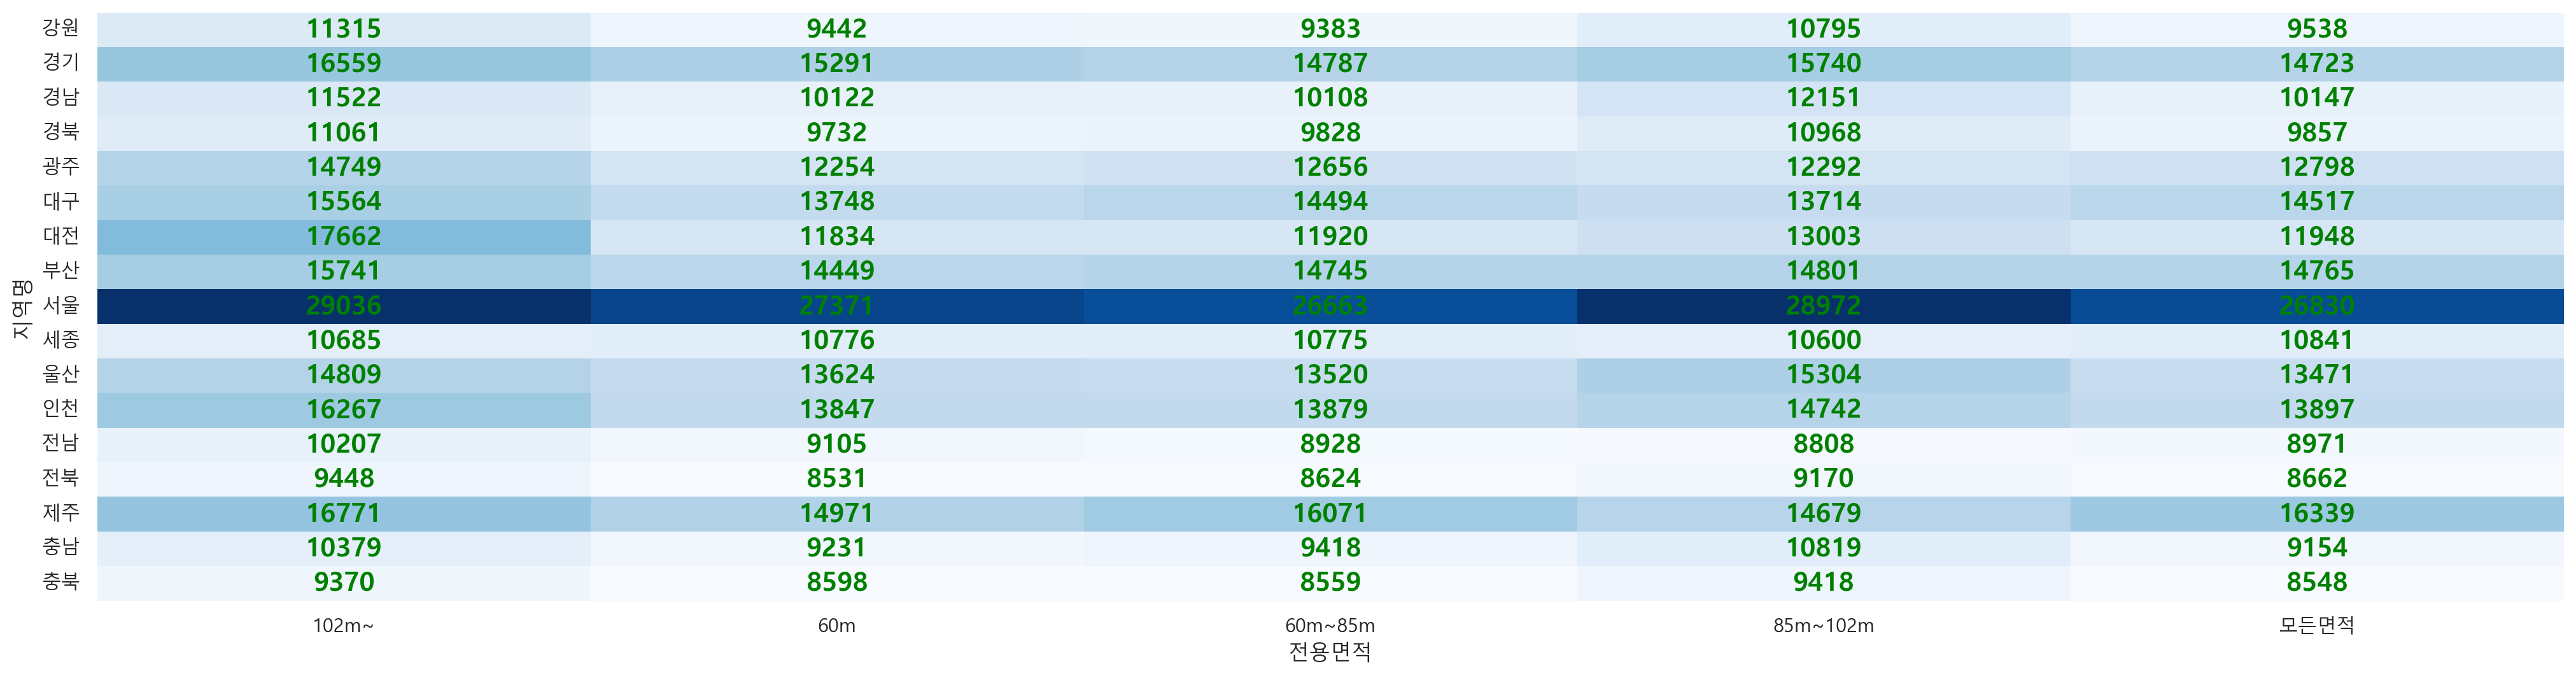

In [207]:
plt.figure(figsize=(25,6))
sns.heatmap(r, cmap='Blues',annot=True, fmt= '.0f', cbar=False,
           annot_kws={'color':'green','size':15, 'weight':'bold'}
           )
plt.show()




## (5) 연도, 지역별 평당분양가격(평균)

In [211]:
df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack()

지역명             강원         경기            경남            경북            광주  \
연도                                                                        
2015   7188.060000  11060.940   8459.220000   7464.160000   7916.700000   
2016   7162.903846  11684.970   8496.730000   7753.405000   9190.683333   
2017   7318.850000  12296.185   8806.600000   8288.063793   9599.700000   
2018   8219.255000  14258.420   9327.670000   8680.776923   9526.953333   
2019   8934.475000  15665.540  10697.615789   9050.250000  12111.675000   
2020  10302.423214  15106.080  10919.272222   9997.693750  13406.485714   
2021  10291.325000  14567.080  11302.335000  11227.150000  13709.850000   
2022  11644.215000  16621.550  12455.685000  12018.050000  15095.885106   
2023  13409.385000  20175.210  13283.182759  13025.320000  17957.852830   
2024  15622.282500  21532.500  13776.571875  14085.355263  18548.408108   

지역명             대구            대전            부산            서울            세종  \
연도                                                                           
2015   9018.900000   8190.600000  10377.400000  20315.680000   8765.020000   
2016  10282.030000   8910.733333  10743.535000  21753.435000   8857.805000   
2017  12191.972222   9912.910526  11637.615000  21864.095000   9132.945763   
2018  12139.252632  10234.106667  12889.965000  23202.245000  10340.463158   
2019  14081.650000  12619.200000  13537.865000  28286.830000  11299.394118   
2020  15314.200000  11238.844737  13353.010000  29781.015000  11628.100000   
2021  15586.285000  11994.216667  14317.655000  29380.450000  12578.060000   
2022  16821.915000  14113.880000  18166.835593  29128.531034  11309.971698   
2023  17656.747059  17917.288889  20470.850847  33230.560000  12278.200000   
2024  24102.283333  19881.922500  22900.267500  38981.827500  19115.800000   

지역명             울산            인천            전남            전북            제주  \
연도                                                                           
2015   9367.600000  10976.020000   6798.880000   7110.400000   7951.075000   
2016   9582.574138  11099.055000   6936.600000   6906.625000   9567.480000   
2017  10630.160870  11672.430000   7413.230000   7406.126316  12628.539623   
2018  10241.400000  11881.532143   7929.845000   8174.595000  11935.968000   
2019  10216.250000  13249.775000   8219.275862   8532.260000  11828.469231   
2020  12837.600000  14982.990000   9562.398214   8559.430000  14192.876923   
2021  14191.953061  15774.330000   9980.760000   9047.928814  22302.342857   
2022  17903.751724  17341.830000  10635.508475  10003.070000  18953.825000   
2023  18832.093220  16150.695000  11846.682692  10966.024528  24095.901923   
2024  17828.765625  21506.347500  13540.415625  12400.941667  25096.087500   

지역명             충남            충북  
연도                                
2015   7689.880000   6828.800000  
2016   7958.225000   7133.335000  
2017   8157.315517   7462.565000  
2018   8201.820000   8149.295000  
2019   8748.840000   7970.875000  
2020   9139.380000   8358.956897  
2021   9860.741379   8822.385000  
2022  11730.345000  10033.540000  
2023  12580.590000  11103.950000  
2024  12739.650000  12851.767500

In [216]:
df_last.pivot_table(index = ['연도','지역명'],
                   values='평당분양가격').unstack()
r = df_last.pivot_table(index='연도',
                   columns ='지역명',
                   values='평당분양가격')

In [217]:
r

지역명             강원         경기            경남            경북            광주  \
연도                                                                        
2015   7188.060000  11060.940   8459.220000   7464.160000   7916.700000   
2016   7162.903846  11684.970   8496.730000   7753.405000   9190.683333   
2017   7318.850000  12296.185   8806.600000   8288.063793   9599.700000   
2018   8219.255000  14258.420   9327.670000   8680.776923   9526.953333   
2019   8934.475000  15665.540  10697.615789   9050.250000  12111.675000   
2020  10302.423214  15106.080  10919.272222   9997.693750  13406.485714   
2021  10291.325000  14567.080  11302.335000  11227.150000  13709.850000   
2022  11644.215000  16621.550  12455.685000  12018.050000  15095.885106   
2023  13409.385000  20175.210  13283.182759  13025.320000  17957.852830   
2024  15622.282500  21532.500  13776.571875  14085.355263  18548.408108   

지역명             대구            대전            부산            서울            세종  \
연도                                                                           
2015   9018.900000   8190.600000  10377.400000  20315.680000   8765.020000   
2016  10282.030000   8910.733333  10743.535000  21753.435000   8857.805000   
2017  12191.972222   9912.910526  11637.615000  21864.095000   9132.945763   
2018  12139.252632  10234.106667  12889.965000  23202.245000  10340.463158   
2019  14081.650000  12619.200000  13537.865000  28286.830000  11299.394118   
2020  15314.200000  11238.844737  13353.010000  29781.015000  11628.100000   
2021  15586.285000  11994.216667  14317.655000  29380.450000  12578.060000   
2022  16821.915000  14113.880000  18166.835593  29128.531034  11309.971698   
2023  17656.747059  17917.288889  20470.850847  33230.560000  12278.200000   
2024  24102.283333  19881.922500  22900.267500  38981.827500  19115.800000   

지역명             울산            인천            전남            전북            제주  \
연도                                                                           
2015   9367.600000  10976.020000   6798.880000   7110.400000   7951.075000   
2016   9582.574138  11099.055000   6936.600000   6906.625000   9567.480000   
2017  10630.160870  11672.430000   7413.230000   7406.126316  12628.539623   
2018  10241.400000  11881.532143   7929.845000   8174.595000  11935.968000   
2019  10216.250000  13249.775000   8219.275862   8532.260000  11828.469231   
2020  12837.600000  14982.990000   9562.398214   8559.430000  14192.876923   
2021  14191.953061  15774.330000   9980.760000   9047.928814  22302.342857   
2022  17903.751724  17341.830000  10635.508475  10003.070000  18953.825000   
2023  18832.093220  16150.695000  11846.682692  10966.024528  24095.901923   
2024  17828.765625  21506.347500  13540.415625  12400.941667  25096.087500   

지역명             충남            충북  
연도                                
2015   7689.880000   6828.800000  
2016   7958.225000   7133.335000  
2017   8157.315517   7462.565000  
2018   8201.820000   8149.295000  
2019   8748.840000   7970.875000  
2020   9139.380000   8358.956897  
2021   9860.741379   8822.385000  
2022  11730.345000  10033.540000  
2023  12580.590000  11103.950000  
2024  12739.650000  12851.767500

In [218]:
r.loc[2024].head(1)

지역명
강원    15622.2825
Name: 2024, dtype: float64

In [220]:
r['제주'].head(1)

연도
2015    7951.075
Name: 제주, dtype: float64

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html


- 색상이나 style참조 pdf 14p

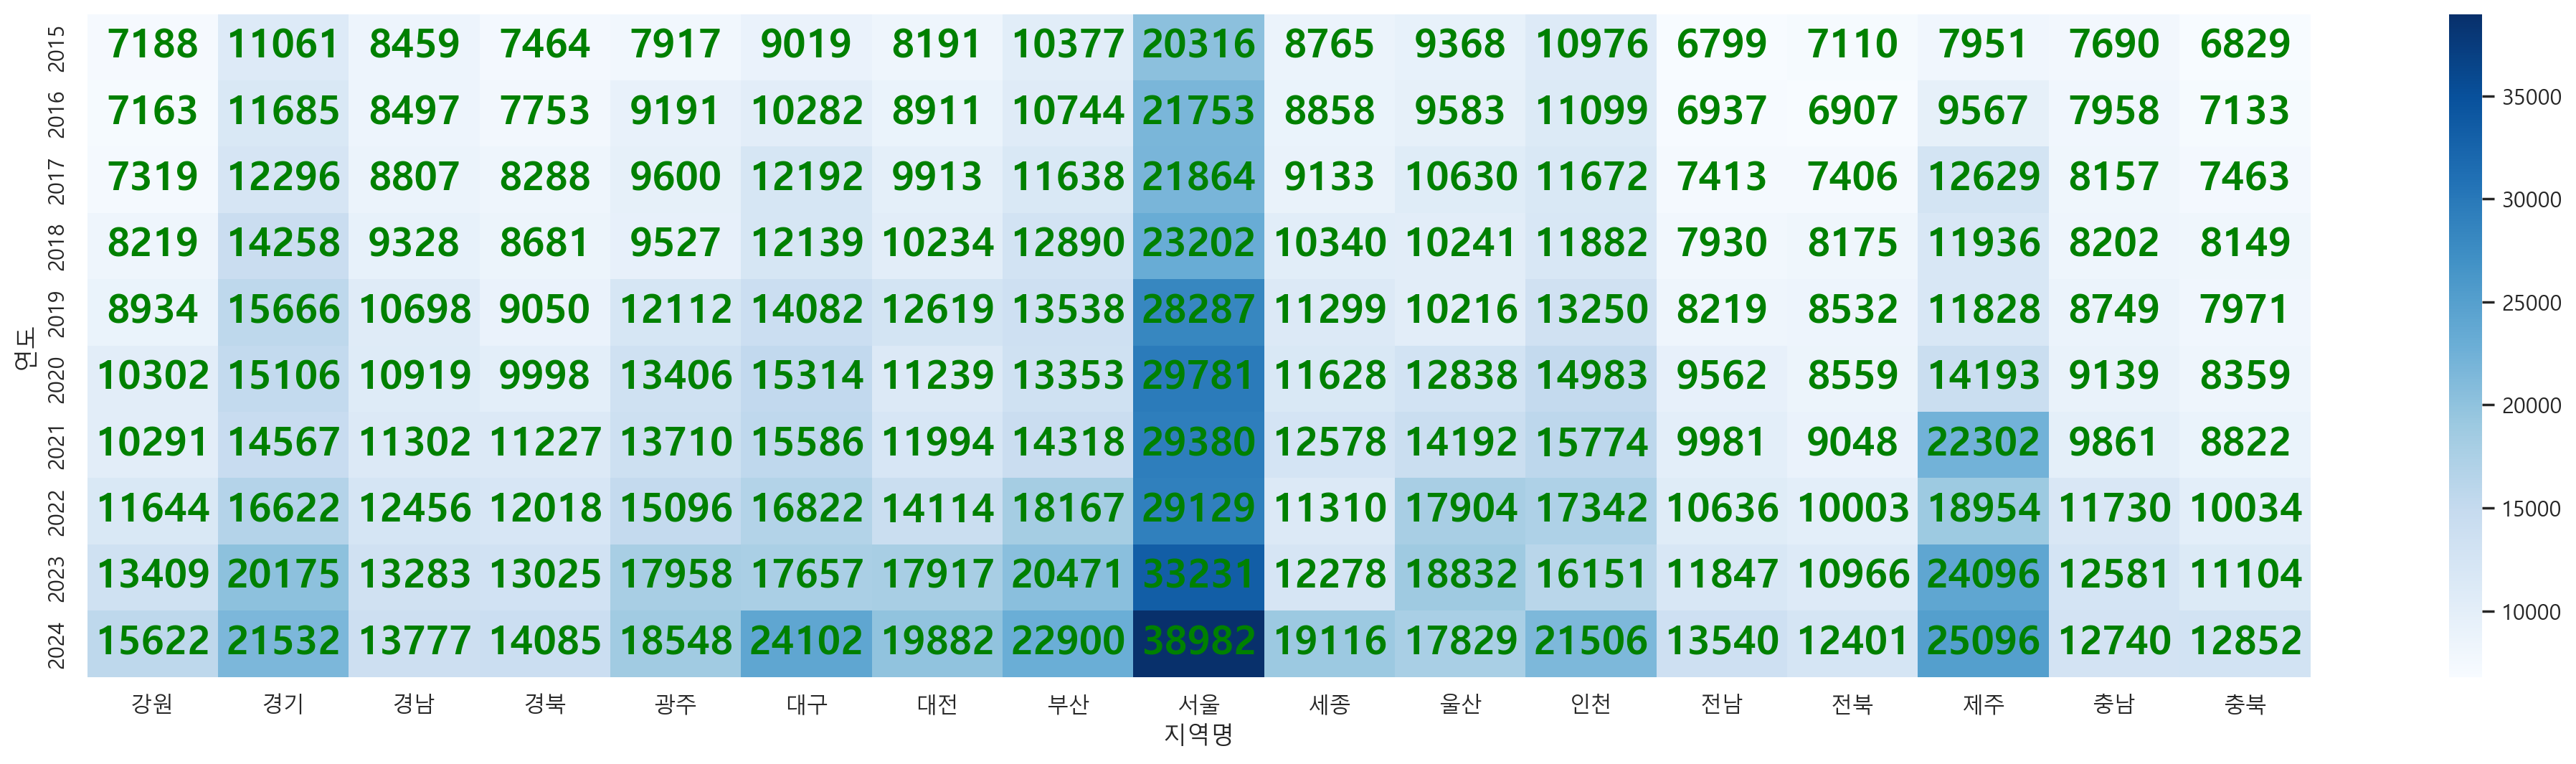

In [234]:
plt.figure(figsize=(25,6))
sns.heatmap(r, annot=True, fmt= '.0f', cbar=True, cmap='Blues',
           annot_kws={'color':'green','size':20, 'weight':'bold'}
           )
plt.show()



In [229]:
r['경기'].head(1)

연도
2015    11060.94
Name: 경기, dtype: float64

In [230]:
r.loc[2023]

지역명
강원    13409.385000
경기    20175.210000
경남    13283.182759
경북    13025.320000
광주    17957.852830
대구    17656.747059
대전    17917.288889
부산    20470.850847
서울    33230.560000
세종    12278.200000
울산    18832.093220
인천    16150.695000
전남    11846.682692
전북    10966.024528
제주    24095.901923
충남    12580.590000
충북    11103.950000
Name: 2023, dtype: float64

# 8. matplotlib으로 시각화(위의 도표)
https://www.research.autodesk.com/publications/same-stats-different-graphs/
## (1) 지역별 결측치를 제외한 데이터수(line, bar)

## (2) 지역별 평당분양가격 (line, bar)

## (3) 전용면적별 평당분양가격(barplot)

## (4) 연도별 평균 평당분양가격(line, bar)

범례:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

# 9. seaborn으로 시각화
- 위에서 시각화한 내용을 seaborn으로 시각화

## (1) 지역별 평당분양가격

## (2) 연도별 평당분양가격

## (3) 그 외 lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용(교안 20page)

# 10. 구조가 다른 df_first와 df_last를 연결 후 분석
## (1) concat
- new_first :df_first를 [지역명, 연도, 월, 평당분양가격]으로 변환
- new_last : df_last를 [지역명, 연도, 월, 평당분양가격]으로 변환
                (전용면적이 모든면적인 행만 추출후, 전용면적 열을 삭제)

## (2) 결측치 대체(연도별, 지역별 중위값)

## (3) df.csv파일로 출력

## (4) 7절부터 9절까지 분석을 한다(전용면적별 분석은 불가)

- 지역명별 데이터 갯수는 결측치가 없어서 동일(groupby나 pivot_table등으로 확인)
- 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)
- 연도별 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)

### ① 지역명별 데이터 행 갯수 : 결과가 1차원 시리즈

### ② 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [ ]:
# 지역명당 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ③ 연도별 평당분양가격(평균)

In [ ]:
# 연도별 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ④ 연도, 지역별 평당분양가격(평균)

In [ ]:
# 연도별, 지역별 평당분양가격 시각화(heatmap)

In [ ]:
# 년도별 평균 평당분양가격의 추이

In [ ]:
# 위의 그래프가 겹쳐서 작 보이지 않아 분리

In [ ]:
# 관계형 그래프의 서브플롯을 그리는 함수는 relplot
# 범주형 그래프의 서브플롯을 그리는 함수는 catplot

In [ ]:
# 연도별 평당분양가격의 사분위수


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 boxenplot)


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 violinplot)


In [ ]:
# 연도에 따른 평당분양가격을 회귀식으로 시각화


In [ ]:
# swarmplot은 많은 데이터를 그리기에는 시간이 많이 걸려 5%만 sampling후 그릴 것을 추천
# 연도별 평당분양가격 산점도
 

In [ ]:
# 분양가격을 hist
